# Summary Statistics:

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [16]:
# data import ensure final.csv is in your main dir
df=pd.read_csv('../final.csv')

## 1. Data Overview:
   - What is the shape of the dataset?
   - List column names and their data types
   - How many null values exist in each column?

In [23]:
# 1. Data Overview
def analyze_data_overview(df):
    print("Shape:", df.shape)
    print("\nColumn Types:\n", df.dtypes)
    print("\nNull Values:\n", df.isnull().sum())

In [24]:
    analyze_data_overview(df)

Shape: (1000, 12)

Column Types:
 first_name             object
last_name              object
gender                 object
emails                 object
country                object
location_latitude     float64
location_longitude    float64
make                   object
model                  object
price                   int64
start                  object
end                    object
dtype: object

Null Values:
 first_name              0
last_name               0
gender                  0
emails                  0
country                 0
location_latitude       0
location_longitude      0
make                    0
model                   0
price                   0
start                   0
end                   903
dtype: int64


## 2. Location Analysis:
   - Calculate summary statistics for location coordinates
   - Visualize customer locations on a scatter plot
   - Find the distribution of customers by country

In [29]:
# 2. Location Analysis
def analyze_locations(df):
    
    # Convert coordinates to float
    df['location_latitude'] = df['location_latitude'].astype(float)
    df['location_longitude'] = df['location_longitude'].astype(float)

    # Summary statistics
    coord_stats = df[['location_latitude', 'location_longitude']].describe()
    print("Coordinate Statistics:\n", coord_stats)

    # Plot locations
    plt.figure(figsize=(12, 8))
    plt.scatter(df['location_longitude'], df['location_latitude'], alpha=0.5)
    plt.title('Customer Locations')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

    # Country distribution
    country_dist = df['country'].value_counts()
    plt.figure(figsize=(10, 6))
    country_dist.plot(kind='bar')
    plt.title('Customers by Country')
    plt.xticks(rotation=45)
    plt.show()

Coordinate Statistics:
        location_latitude  location_longitude
count        1000.000000         1000.000000
mean            0.059677           -0.452492
std            52.233820          103.354634
min           -89.841560         -179.527338
25%           -45.598198          -88.534211
50%             1.525346            0.042488
75%            45.324599           86.248568
max            89.933780          179.564033


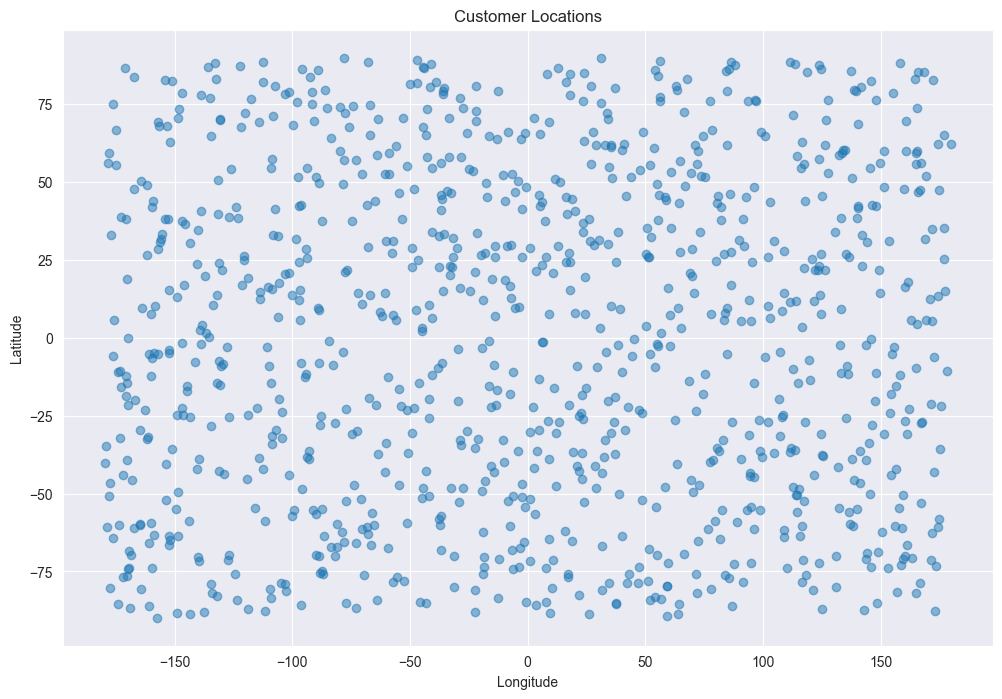

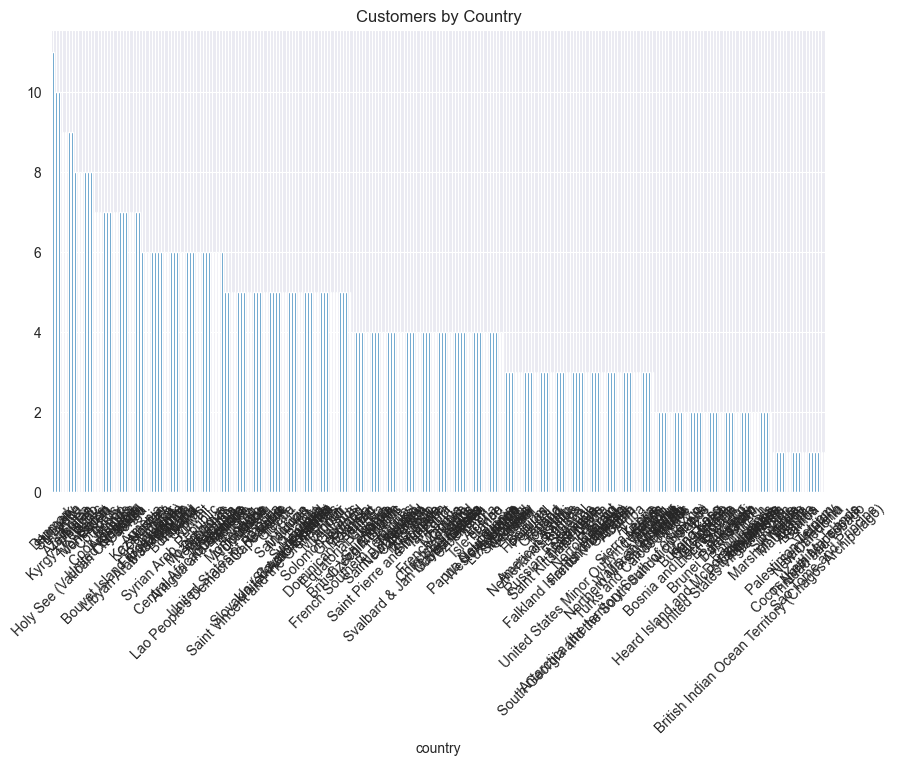

In [30]:
analyze_locations(df)

## 3. Price Analysis:
   - Calculate summary statistics for car prices
   - Identify and handle price outliers
   - Create price segments and analyze distribution

In [44]:
# 3. Price Analysis
def analyze_prices(df):
    # Summary statistics
    price_stats = df['price'].describe()
    print("Price Statistics:\n", price_stats)
    
    # Detect outliers using IQR method
    Q1 = df['price'].quantile(0.25)
    Q3 = df['price'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))]
    print("\nNumber of price outliers:", len(outliers))
    
    # Create price segments
    df['price_segment'] = pd.qcut(df['price'], q=4, labels=['Budget', 'Mid-range', 'Premium', 'Luxury'])
    # Plot price distribution
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x='make', y='price_segment')
    plt.title('Car Price Distribution')
    plt.show()
    
    # Plot price distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='price', bins=50)
    plt.title('Car Price Distribution')
    plt.show()


Price Statistics:
 count    1.000000e+03
mean     1.062850e+05
std      2.400754e+05
min      1.900000e+04
25%      3.500000e+04
50%      4.400000e+04
75%      8.900000e+04
max      2.200000e+06
Name: price, dtype: float64

Number of price outliers: 124


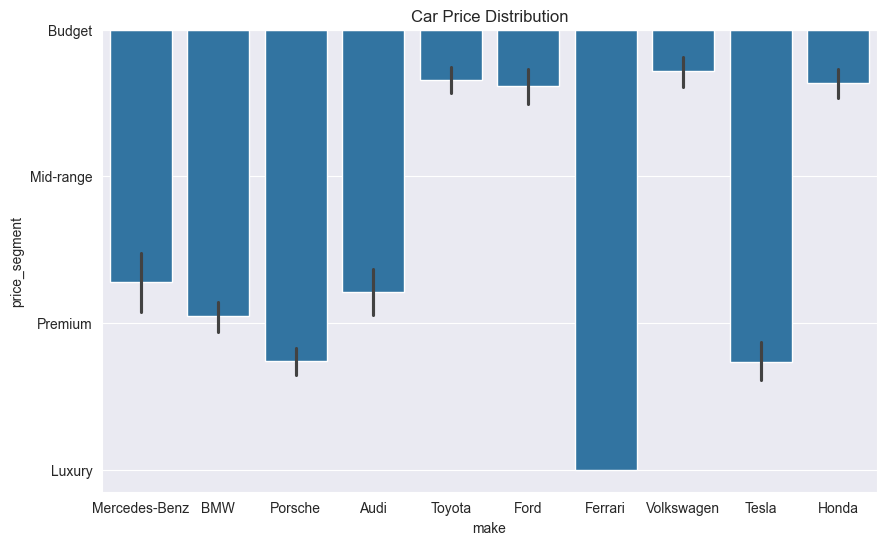

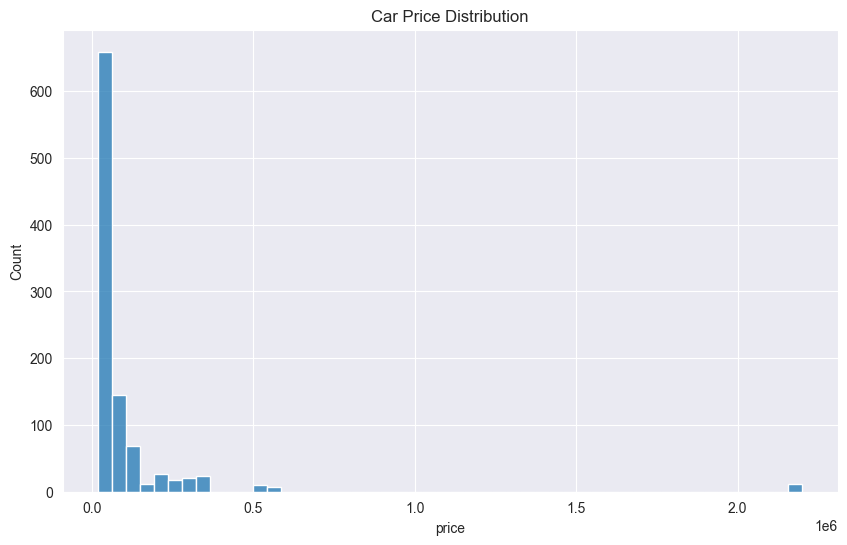

In [45]:
analyze_prices(df)

## 4. Name Processing:
   - Convert names to lowercase
   - Combine first and last names
   - Analyze name lengths distribution

In [46]:

# 4. Name Processing
def process_names(df):
    # Convert to lowercase
    df['first_name'] = df['first_name'].str.lower()
    df['last_name'] = df['last_name'].str.lower()
    
    # Combine names
    df['full_name'] = df['first_name'] + ' ' + df['last_name']
    
    # Analyze name lengths
    df['name_length'] = df['full_name'].str.len()
    
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='name_length', bins=30)
    plt.title('Distribution of Full Name Lengths')
    plt.show()


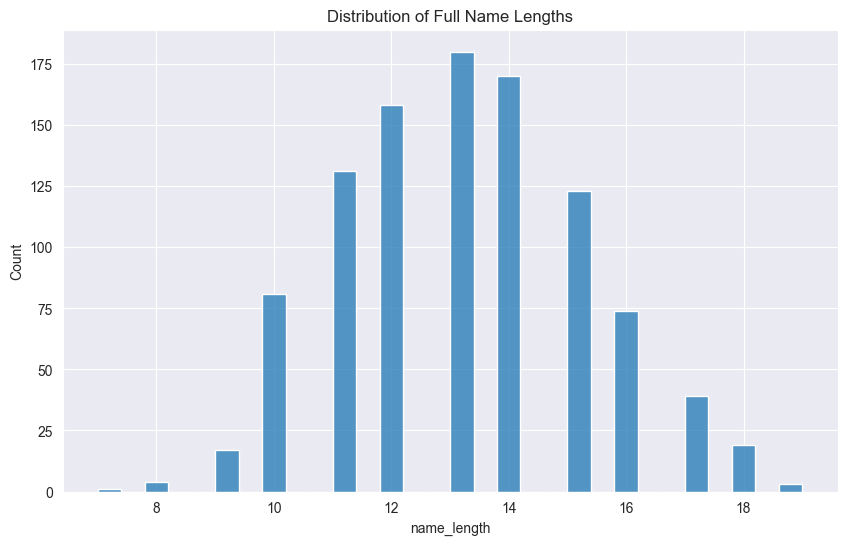

In [48]:
    process_names(df)

## 5. Temporal Analysis:
   - Calculate average tenure (time between start and end dates)
   - Analyze start date distribution by year
   - Create active/inactive customer status

In [71]:

# 5. Temporal Analysis
def analyze_temporal(df):
    # Calculate tenure
    ends=[]
    starts=[]
    for end in df['end'].fillna(datetime.now()):
        for start in df['start'].fillna(datetime.now().strftime('%m/%d/%Y')):
            if isinstance(start, str):
                starts.append(datetime.strptime(start, '%m/%d/%Y'))
            else:
                starts.append(start.strftime('%m/%d/%Y'))
            if isinstance(end, str):
                ends.append(datetime.strptime(end, '%m/%d/%Y'))
            else:
                ends.append(end.strftime('%m/%d/%Y'))
    df['tenure'] = (ends - starts).dt.days
    
    # Start date distribution by year
    df['start_year'] = df['start'].dt.year
    year_dist = df['start_year'].value_counts().sort_index()
    
    plt.figure(figsize=(10, 6))
    year_dist.plot(kind='bar')
    plt.title('Customer Start Dates by Year')
    plt.show()
    
    # Active/Inactive status
    df['status'] = np.where(df['end'].isnull(), 'Active', 'Inactive')
    status_dist = df['status'].value_counts()
    
    plt.figure(figsize=(8, 8))
    plt.pie(status_dist, labels=status_dist.index, autopct='%1.1f%%')
    plt.title('Customer Status Distribution')
    plt.show()

In [72]:
    analyze_temporal(df)

ValueError: time data '2010-04-14 21:50:54' does not match format '%m/%d/%Y'

In [ ]:

# # Execute all analyses
# def run_all_analyses(df):
#     analyze_data_overview(df)
#     analyze_locations(df)
#     analyze_prices(df)
#     process_names(df)
#     analyze_temporal(df)